# Support Vector Machine (SVM)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [21]:
df = pd.read_csv('../../dataset/heart-failure-tratado.csv')
df.head(3)

,ExerciseAngina,Oldpeak,ST_Slope,MaxHR,ChestPainType,HeartDisease
0,0,0.0,2,172,1,0
1,0,1.0,1,156,2,1
2,0,0.0,2,98,1,0


In [22]:
# Features
x = df.drop(columns=['HeartDisease'])

# Target
y = df['HeartDisease']

In [23]:
# Padronizar os dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [24]:
# Split do dataset em conjuntos de treinamento e teste.

# # 70% treino, 30% teste
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=45)

# 90% treino, 10% teste
# x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=45)



In [25]:
modelo_svm = SVC()
modelo_svm.fit(x_train, y_train)

y_pred_svm = modelo_svm.predict(x_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='micro')
recall = recall_score(y_test, y_pred_svm, average='micro')
f1 = f1_score(y_test, y_pred_svm, average='micro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1)

Acurácia: 0.8442028985507246
Precisão: 0.8442028985507246
Revocação: 0.8442028985507246
F1-Score: 0.8442028985507246


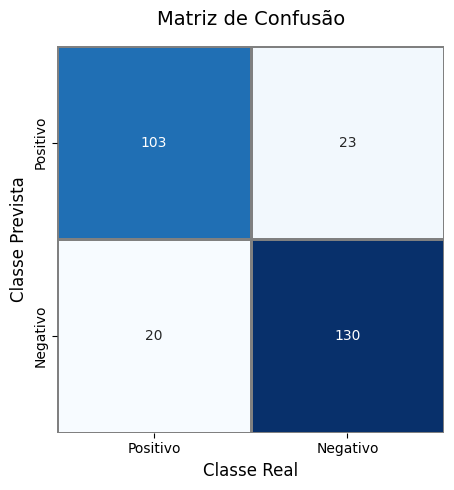

In [27]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'],
            linewidths=1, linecolor='gray', square=True)

plt.title("Matriz de Confusão", fontsize=14, pad=15)
plt.xlabel("Classe Real", fontsize=12)
plt.ylabel("Classe Prevista", fontsize=12)
plt.tight_layout()
plt.show()

# Tuning dos hiperparâmetros

In [28]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [29]:
grid = GridSearchCV(modelo_svm, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

# Resultados
print("Melhores parâmetros:", grid.best_params_)

# Avaliação no conjunto de teste
y_pred = grid.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1)

Melhores parâmetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Acurácia: 0.8442028985507246
Precisão: 0.8442028985507246
Revocação: 0.8442028985507246
F1-Score: 0.8442028985507246


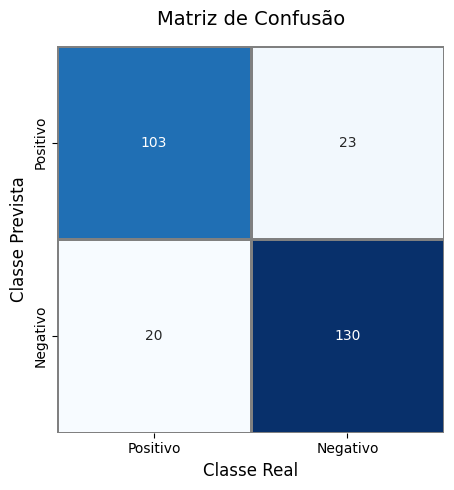

In [30]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'],
            linewidths=1, linecolor='gray', square=True)

plt.title("Matriz de Confusão", fontsize=14, pad=15)
plt.xlabel("Classe Real", fontsize=12)
plt.ylabel("Classe Prevista", fontsize=12)
plt.tight_layout()
plt.show()